In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#reading all the files into the notebook


jan2016=pd.read_csv('Performance_Year_Financial_and_Quality_Results_PUF_2016_01_01.csv')
jan2017=pd.read_csv('Performance_Year_Financial_and_Quality_Results_PUF_2017_01_01.csv')
jan2018=pd.read_csv('Performance_Year_Financial_and_Quality_Results_PUF_2018_01_01.csv')
jan2019=pd.read_csv('Performance_Year_Financial_and_Quality_Results_PUF_2019_01_01.csv')
jan2020=pd.read_csv('Performance_Year_Financial_and_Quality_Results_PUF_2020_01_01.csv')


In [3]:
jan2020.head()

,ACO_ID,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Current_Start_Date,Current_Track_1,Current_Track_2,Current_Track_3,Current_Track_1_Plus,Current_BASIC_A,Current_BASIC_B,Current_BASIC_C,Current_BASIC_D,Current_BASIC_E,Current_ENHANCED,Risk_Model,Adv_Pay,AIM,SNF_Waiver,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,GenSaveLoss,DisAdj,EarnSaveLoss,DisAffQual,Met_QPS,QualScore,RecvdMean,RegTrndUpdt,PosRegAdj,UpdatedBnchmk,HistBnchmk,ABtotBnchmk,ABtotExp,Adv_Pay_Amt,Adv_Pay_Recoup,QualPerfShare,FinalShareRate,RevLossLimit,Rev_Exp_Cat,Per_Capita_Exp_ALL_ESRD_BY1,Per_Capita_Exp_ALL_DIS_BY1,Per_Capita_Exp_ALL_AGDU_BY1,Per_Capita_Exp_ALL_AGND_BY1,Per_Capita_Exp_ALL_ESRD_BY2,Per_Capita_Exp_ALL_DIS_BY2,Per_Capita_Exp_ALL_AGDU_BY2,Per_Capita_Exp_ALL_AGND_BY2,Per_Capita_Exp_ALL_ESRD_BY3,Per_Capita_Exp_ALL_DIS_BY3,Per_Capita_Exp_ALL_AGDU_BY3,Per_Capita_Exp_ALL_AGND_BY3,Per_Capita_Exp_ALL_ESRD_PY,Per_Capita_Exp_ALL_DIS_PY,Per_Capita_Exp_ALL_AGDU_PY,Per_Capita_Exp_ALL_AGND_PY,Per_Capita_Exp_TOTAL_PY,CMS_HCC_RiskScore_ESRD_BY1,CMS_HCC_RiskScore_DIS_BY1,CMS_HCC_RiskScore_AGDU_BY1,CMS_HCC_RiskScore_AGND_BY1,CMS_HCC_RiskScore_ESRD_BY2,CMS_HCC_RiskScore_DIS_BY2,CMS_HCC_RiskScore_AGDU_BY2,CMS_HCC_RiskScore_AGND_BY2,CMS_HCC_RiskScore_ESRD_BY3,CMS_HCC_RiskScore_DIS_BY3,CMS_HCC_RiskScore_AGDU_BY3,CMS_HCC_RiskScore_AGND_BY3,CMS_HCC_RiskScore_ESRD_PY,CMS_HCC_RiskScore_DIS_PY,CMS_HCC_RiskScore_AGDU_PY,CMS_HCC_RiskScore_AGND_PY,N_AB_Year_ESRD_BY3,N_AB_Year_DIS_BY3,N_AB_Year_AGED_Dual_BY3,N_AB_Year_AGED_NonDual_BY3,N_AB_Year_PY,N_AB_Year_ESRD_PY,N_AB_Year_DIS_PY,N_AB_Year_AGED_Dual_PY,N_AB_Year_AGED_NonDual_PY,N_Ben_Age_0_64,N_Ben_Age_65_74,N_Ben_Age_75_84,N_Ben_Age_85plus,N_Ben_Female,N_Ben_Male,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other,CapAnn_INP_All,CapAnn_INP_S_trm,CapAnn_INP_L_trm,CapAnn_INP_Rehab,CapAnn_INP_Psych,CapAnn_HSP,CapAnn_SNF,CapAnn_OPD,CapAnn_PB,CapAnn_AmbPay,CapAnn_HHA,CapAnn_DME,ADM,ADM_S_Trm,ADM_L_Trm,ADM_Rehab,ADM_Psych,chf_adm,copd_adm,prov_Rate_1000,P_EDV_Vis,P_EDV_Vis_HOSP,P_CT_VIS,P_MRI_VIS,P_EM_Total,P_EM_PCP_Vis,P_EM_SP_Vis,P_Nurse_Vis,P_FQHC_RHC_Vis,P_SNF_ADM,N_CAH,N_FQHC,N_RHC,N_ETA,N_Hosp,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34,ACO45,ACO46,ACO8,ACO38,ACO43,ACO13,ACO14,ACO17,ACO18,ACO19,ACO20,ACO42,ACO40,ACO27,ACO28
0,A1001,Palm Beach Accountable Care Organization,FL,Renewal,3,7/1/2012,7/1/2019,0,0,0,0,0,0,0,0,0,1,Two-Sided,0,0,1,80864,0.0757,0.0200,72427998,72427998,NaN,54320998,1,1,100.00,0,0,1.0,12098,13044,956864945,884436947,NaN,NaN,0.75,0.75,0,Low Revenue,83980,11731,17307,11370,81423,11713,16704,11600,86154,12158,16628,11718,80878,10941,13860,10598,11182,1.012,1.096,1.081,1.156,1.009,1.029,1.059,1.140,1.019,1.041,1.075,1.150,1.010,1.052,1.078,1.147,517,4030,4874,71808,79093,454,3172,4035,71432,4986,34477,28630,12771,46817,34047,71224,3447,484,2558,29,3122,2514,2219,55,233,29,245,389,1657,5591,79,658,305,237,220,1,12,3,10,4,831,452,183,676,338,15065,6291,7776,985,13,35,0,0,0,0,0,0,466,691,319,112,0,^,^,^,^,^,^,^,^,^,^,~,~,0.91,91.19,90.12,94.87,86.08,87.15,90.08,93.93,42.86,6.83,92.03
1,A1006,Hackensack Alliance ACO,"NJ, NY",Renewal,3,4/1/2012,7/1/2019,0,0,0,0,0,1,0,0,0,0,One-Sided,0,0,0,33798,-0.0050,0.0236,-1917725,0,NaN,0,1,1,97.81,0,0,0.0,11725,12649,383064284,384982008,NaN,NaN,0.40,0.39,0,Low Revenue,92527,12686,15676,11075,91754,12889,17254,11559,102859,12368,18318,11520,100849,12904,19170,10451,11784,1.010,1.047,0.987,1.062,1.030,1.006,1.019,1.042,1.009,0.975,1.014,1.016,1.027,1.022,1.021,0.995,256,2272,2275,30720,32669,223,1997,2124,28325,2937,14846,10600,5415,20130,13668,27545,2151,1162,942,15,1983,3119,2818,30,207,91,216,1235,2598,4053,106,533,218,248,232,1,8,6,13,4,801,454,197,641,250,11500,4011,6683,803,3,66,0,0,0,0,1,3,464,680,216,121,4,^,^,^,^,^,^,^,^,^,^,~,~,0.72,92.6,80,100,79.86,76,76.89,87.18,14.29,8.53,80.09
2,A1023,"Arizona Connected Care, LLC",AZ,Renewal,3,4/1/2012,7/1/2019,0,0,0,0,

Current_Track_1    410
Current_Track_2      6
Current_Track_3     16
dtype: int64


<AxesSubplot:>

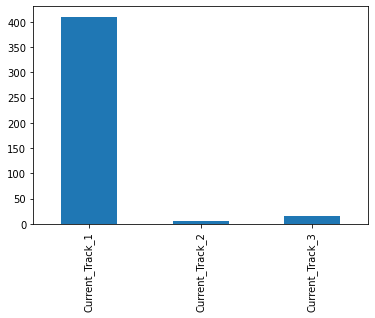

In [4]:
#finding distribution of the Track's for the first year 
print(jan2016[['Current_Track_1', 'Current_Track_2','Current_Track_3']].sum())
jan2016[['Current_Track_1', 'Current_Track_2','Current_Track_3']].sum().plot(kind='bar')

Current_Track_1    133
Current_Track_2      2
Current_Track_3      5
dtype: int64


<AxesSubplot:>

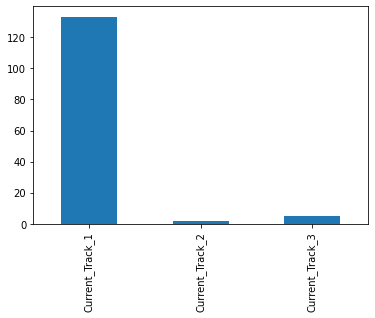

In [5]:
#Current_Track_1' is one-sides shared savings model
#Current_Track_2' is two sided shared savings/loss model
#Current_Track_3- is two sided shared savings/loss model
   
#finding distribution for the tracks for the most recent year with data    
print(jan2020[['Current_Track_1', 'Current_Track_2','Current_Track_3']].sum())
jan2020[['Current_Track_1', 'Current_Track_2','Current_Track_3']].sum().plot(kind='bar')

Text(0.5, 1.0, 'Distribution of Tracks for 2020')

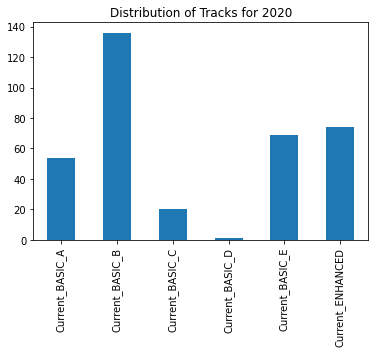

In [6]:
jan2020[['Current_BASIC_A','Current_BASIC_B', 'Current_BASIC_C','Current_BASIC_D',
        'Current_BASIC_E','Current_ENHANCED']].sum().plot(kind='bar')
plt.title('Distribution of Tracks for 2020')


One-Sided    323
Two-Sided    190
Name: Risk_Model, dtype: int64


Text(0.5, 1.0, 'Distribution of Risk Models')

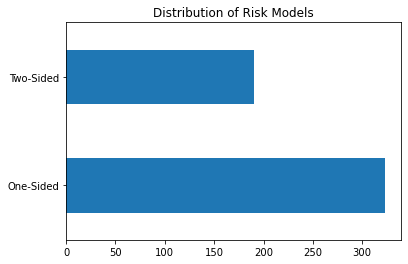

In [7]:
'''Indicates participation in a one-sided shared savings model or a two -sided 
shared savings/losses model forthe performance year.
'''
print(jan2020['Risk_Model'].value_counts())
jan2020['Risk_Model'].value_counts()[:2].plot(kind='barh')
plt.title("Distribution of Risk Models")

# Comparing Savings and Costs by Each Risk Model

Generated savings: Total savings (measured as
Benchmark Minus Expenditures, from first to
last dollar) for ACOs whose savingsrate equaled
or exceeded their MSR. This amount does not
account for the application of the ACO’s final
sharing rate based on quality performance,
reduction due to sequestration, application of
performance payment limit, or repayment of
advance payments. Generated losses: Total
losses(measured as Benchmark Minus Assigned
Expenditures, from first to last dollar) for ACOs
in two
-sided models whose losses rate equaled
or exceeded their MLR. This amount does not
account for the application of the ACO’s final
sharing rate based on quality performance or
the loss sharing limit


Total: Risk_Model
One-Sided    2146610474
Two-Sided    2227758236
Name: GenSaveLoss, dtype: int64
Average: Risk_Model
One-Sided    6.645853e+06
Two-Sided    1.172504e+07
Name: GenSaveLoss, dtype: float64


Text(0.5, 1.0, 'Average Generated by Risk Model')

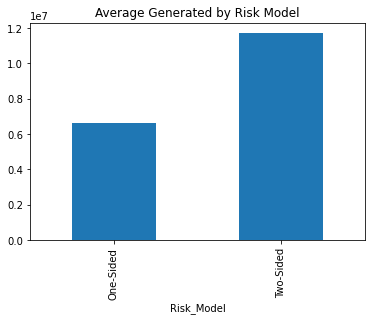

In [8]:
print("Total:",jan2020.groupby(['Risk_Model'])['GenSaveLoss'].sum())
print("Average:",jan2020.groupby(['Risk_Model'])['GenSaveLoss'].mean())
jan2020.groupby(['Risk_Model'])['GenSaveLoss'].mean().plot(kind='bar')
plt.title('Average Generated by Risk Model')

Total earned shared savings: The ACO’s share of
savings for ACOs whose savings rate equaled or
exceeded their MSR, and who were eligible for
a performance payment because they met the
program’s quality performance standard. This
amount accounts for the application of the
ACO’s final sharing rate based on quality
performance (based on ACO track), as well as the reduction in performance payment due to
sequestration and application of the
performance payment limit. This amount does
not account for repayment of advance
payments.
Total earned shared losses: The ACO’s share of
losses for ACOs in two
-sided tracks whose
losses rate equaled or exceeded their MLR,
which is the negative of the MSR chosen. This
amount accounts for the application of the
ACO’s final loss sharing rate based on quality
performance (based on ACO track) the loss
sharing limit and the Extreme and
Uncontrollable Circumstance adjustment.

Total Divided by Risk Model: Risk_Model
One-Sided     911844075
Two-Sided    1371880715
Name: EarnSaveLoss, dtype: int64
Average Divided by Risk Model: Risk_Model
One-Sided    2.823047e+06
Two-Sided    7.220425e+06
Name: EarnSaveLoss, dtype: float64


Text(0.5, 1.0, 'Average Divided by Risk Model')

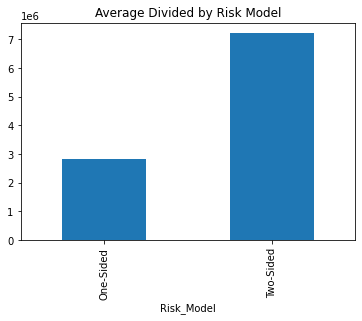

In [9]:
print("Total Divided by Risk Model:",jan2020.groupby(['Risk_Model'])['EarnSaveLoss'].sum())
print('Average Divided by Risk Model:',jan2020.groupby(['Risk_Model'])['EarnSaveLoss'].mean())
jan2020.groupby(['Risk_Model'])['EarnSaveLoss'].mean().plot(kind='bar')
plt.title("Average Divided by Risk Model")

Total Benchmark Expenditures Minus Assigned
Beneficiary Expenditures as a percent of Total
Benchmark Expenditures

Average based on Risk Model: Risk_Model
One-Sided    0.027581
Two-Sided    0.057903
Name: Sav_rate, dtype: float64


Text(0.5, 1.0, 'Average Savings Rate by Risk Model')

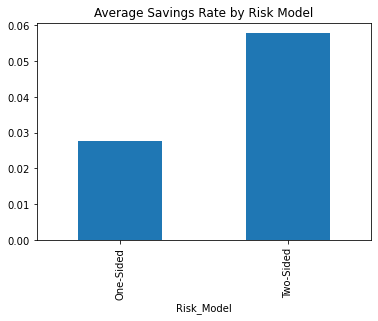

In [10]:
print("Average based on Risk Model:",jan2020.groupby(['Risk_Model'])['Sav_rate'].mean())
jan2020.groupby(['Risk_Model'])['Sav_rate'].mean().plot(kind='bar')
plt.title("Average Savings Rate by Risk Model")

Average based on Risk Model: Risk_Model
One-Sided    0.431084
Two-Sided    0.591895
Name: FinalShareRate, dtype: float64


Text(0.5, 1.0, 'Average Final Share Rate by Risk Model')

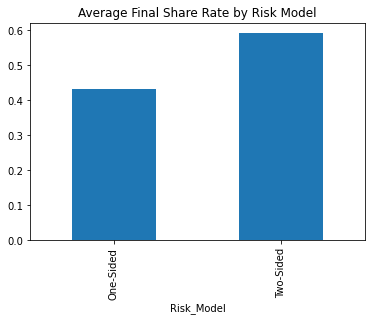

In [11]:
print("Average based on Risk Model:",jan2020.groupby(['Risk_Model'])['FinalShareRate'].mean())
jan2020.groupby(['Risk_Model'])['FinalShareRate'].mean().plot(kind='bar')
plt.title("Average Final Share Rate by Risk Model")

/1 flag; =1 if ACO met the quality performance
standard; otherwise =0. An ACO must meet the
quality performance standard to be eligible to
share in any savings generated. Any ACO that
did not completely report quality data did not
meet the quality performance standard unless
the ACO was determined to be impacted by an
Extreme and Uncontrollable Circumstance. The
quality performance standard for ACOs in their
first performance year is based on complete
and accurate reporting of all required quality
measures. ACOs beyond the first performance
year of their first agreement period must also
meet minimum attainment (which is the 30th
percentile benchmark for pay
-for
-performance
measures and complete reporting for pay
-forreporting measures) on at least one measure in
each domain. For ACOs determined to have
been affected by an Extreme and
Uncontrollable Circumstance, the ACO will
automatically meet the quality performance
standard.

Total: Risk_Model  Met_QPS
One-Sided   1          323
Two-Sided   1          190
Name: Met_QPS, dtype: int64


Text(0.5, 1.0, 'Total Meeting Standards by Model')

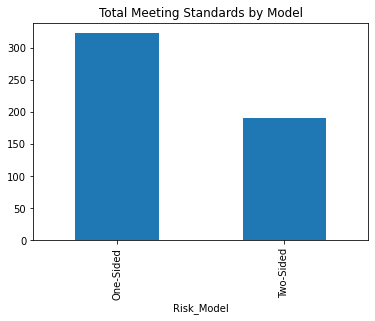

In [12]:
#everyone met quality performance standards
print('Total:',jan2020.groupby(['Risk_Model'])['Met_QPS'].value_counts())
jan2020.groupby(['Risk_Model'])['Met_QPS'].sum().plot(kind='bar')
plt.title("Total Meeting Standards by Model")

In [14]:
#finding the amount of plans that met and didnt meet qps standards each year

print('2016 QPS counts:',jan2016['Met_QPS'].value_counts())
print('2017 QPS counts:', jan2017['Met_QPS'].value_counts())
print('2018 QPS counts:', jan2018['Met_QPS'].value_counts())
print('2020 QPS counts:', jan2020['Met_QPS'].value_counts())

2016 QPS counts: 1    428
0      4
Name: Met_QPS, dtype: int64
2017 QPS counts: 1    468
0      4
Name: Met_QPS, dtype: int64
2018 QPS counts: 1    546
0      2
Name: Met_QPS, dtype: int64
2020 QPS counts: 1    513
Name: Met_QPS, dtype: int64


In [15]:
#creating a master dataframe for all the years
masterdf=pd.concat([jan2016,jan2017,jan2018,jan2019,jan2020], axis=0, ignore_index=True)

In [16]:
masterdf.head(10)

,ACO_Num,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Initial_Track_1,Initial_Track_2,Initial_Track_3,Current_Start_Date,Current_Track_1,Current_Track_2,Current_Track_3,Adv_Pay,AIM,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,GenSaveLoss,EarnSaveLoss,Met_QPS,QualScore,Prior_Sav_Adj,UpdatedBnchmk,HistBnchmk,ABtotBnchmk,ABtotExp,Adv_Pay_Amt,Adv_Pay_Recoup,QualPerfShare,FinalShareRate,Per_Capita_Exp_ALL_ESRD_BY1,Per_Capita_Exp_ALL_DIS_BY1,Per_Capita_Exp_ALL_AGDU_BY1,Per_Capita_Exp_ALL_AGND_BY1,Per_Capita_Exp_ALL_ESRD_BY2,Per_Capita_Exp_ALL_DIS_BY2,Per_Capita_Exp_ALL_AGDU_BY2,Per_Capita_Exp_ALL_AGND_BY2,Per_Capita_Exp_ALL_ESRD_BY3,Per_Capita_Exp_ALL_DIS_BY3,Per_Capita_Exp_ALL_AGDU_BY3,Per_Capita_Exp_ALL_AGND_BY3,Per_Capita_Exp_ALL_ESRD_PY,Per_Capita_Exp_ALL_DIS_PY,Per_Capita_Exp_ALL_AGDU_PY,Per_Capita_Exp_ALL_AGND_PY,Per_Capita_Exp_TOTAL_PY,CMS_HCC_RiskScore_ESRD_BY1,CMS_HCC_RiskScore_DIS_BY1,CMS_HCC_RiskScore_AGDU_BY1,CMS_HCC_RiskScore_AGND_BY1,CMS_HCC_RiskScore_ESRD_BY2,CMS_HCC_RiskScore_DIS_BY2,CMS_HCC_RiskScore_AGDU_BY2,CMS_HCC_RiskScore_AGND_BY2,CMS_HCC_RiskScore_ESRD_BY3,CMS_HCC_RiskScore_DIS_BY3,CMS_HCC_RiskScore_AGDU_BY3,CMS_HCC_RiskScore_AGND_BY3,CMS_HCC_RiskScore_ESRD_PY,CMS_HCC_RiskScore_DIS_PY,CMS_HCC_RiskScore_AGDU_PY,CMS_HCC_RiskScore_AGND_PY,N_AB_Year_ESRD_BY3,N_AB_Year_DIS_BY3,N_AB_Year_AGED_Dual_BY3,N_AB_Year_AGED_NonDual_BY3,N_AB_Year_PY,N_AB_Year_ESRD_PY,N_AB_Year_DIS_PY,N_AB_Year_AGED_Dual_PY,N_AB_Year_AGED_NonDual_PY,N_Ben_Age_0_64,N_Ben_Age_65_74,N_Ben_Age_75_84,N_Ben_Age_85plus,N_Ben_Female,N_Ben_Male,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other,CapAnn_INP_All,CapAnn_INP_S_trm,CapAnn_INP_L_trm,CapAnn_INP_Rehab,CapAnn_INP_Psych,CapAnn_HSP,CapAnn_SNF,CapAnn_INP_Other,CapAnn_OPD,CapAnn_PB,CapAnn_AmbPay,CapAnn_HHA,CapAnn_DME,ADM,ADM_S_Trm,ADM_L_Trm,ADM_Rehab,ADM_Psych,chf_adm,copd_adm,pneu_adm,readm_Rate_1000,prov_Rate_1000,P_SNF_ADM,P_EDV_Vis,P_EDV_Vis_HOSP,P_CT_VIS,P_MRI_VIS,P_EM_Total,P_EM_PCP_Vis,P_EM_SP_Vis,P_Nurse_Vis,P_FQHC_RHC_Vis,N_CAH,N_FQHC,N_RHC,N_ETA,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34,ACO8,ACO35,ACO36,ACO37,ACO38,ACO9,ACO10,ACO11,ACO39,ACO13,ACO14,ACO15,ACO16,ACO17,ACO18,ACO19,ACO20,ACO21,ACO42,ACO40,DM_Comp,ACO27,ACO41,ACO28,ACO30,ACO31,ACO33,DisAdj,RegTrndUpdt,PosRegAdj,acute_adm,ACO44,ACO43,ACO12,ACO_ID,Initial_Track_1_Plus,Current_Track_1_Plus,SNF_Waiver,DisAffQual,RecvdMean,RevLossLimit,Rev_Exp_Cat,SNF_LOS,SNF_PayperStay,N_Hosp,aco_id,aco_name,aco_state,agree_type,participation_six_months,agreement_period_num,initial_start_date,initial_track_1,initial_track_2,initial_track_3,initial_track_1_plus,initial_basic_a,initial_basic_b,initial_basic_c,initial_basic_d,initial_basic_e,initial_enhanced,current_start_date,current_track_1,current_track_2,current_track_3,current_track_1_plus,current_basic_a,current_basic_b,current_basic_c,current_basic_d,current_basic_e,current_enhanced,risk_model,adv_pay,aim,snf_waiver,n_ab,sav_rate,minsavperc,bnchmkminexp,gensaveloss,disadj,earnsaveloss,disaffqual,met_qps,qualscore,recvdmean,prior_sav_adj,regtrndupdt,posregadj,updatedbnchmk,histbnchmk,abtotbnchmk,abtotexp,adv_pay_amt,adv_pay_recoup,qualperfshare,finalsharerate,revlosslimit,rev_exp_cat,per_capita_exp_all_esrd_by1,per_capita_exp_all_dis_by1,per_capita_exp_all_agdu_by1,per_capita_exp_all_agnd_by1,per_capita_exp_all_esrd_by2,per_capita_exp_all_dis_by2,per_capita_exp_all_agdu_by2,per_capita_exp_all_agnd_by2,per_capita_exp_all_esrd_by3,per_capita_exp_all_dis_by3,per_capita_exp_all_agdu_by3,per_capita_exp_all_agnd_by3,per_capita_exp_all_esrd_py,per_capita_exp_all_dis_py,per_capita_exp_all_agdu_py,per_capita_exp_all_agnd_py,per_capita_exp_total_py,cms_hcc_riskscore_esrd_by1,cms_hcc_riskscore_dis_by1,cms_hcc_riskscore_agdu_by1,cms_hcc_riskscore_agnd_by1,cms_hcc_riskscore_esrd_by2,cms_hcc_riskscore_dis_by2,cms_hcc_riskscore_agdu_by2,cms_hcc_riskscore_agnd_by2,cms_hcc_riskscore_esrd_by3,cms_hcc_ris

In [17]:
#converting the start date to datetime format for easier analysis
masterdf['Current_Start_Date']=pd.to_datetime(masterdf['Current_Start_Date'])
masterdf['Current_Start_Date']=masterdf['Current_Start_Date'].dt.year

Text(0.5, 1.0, 'Count Meeting Quality Standards by Year')

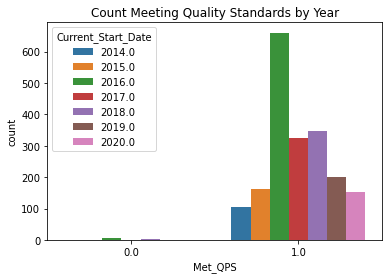

In [18]:
sns.countplot(x="Met_QPS", hue="Current_Start_Date", data=masterdf)
plt.title('Count Meeting Quality Standards by Year')

Text(0.5, 1.0, 'Count of Participants Enrolled Each Year')

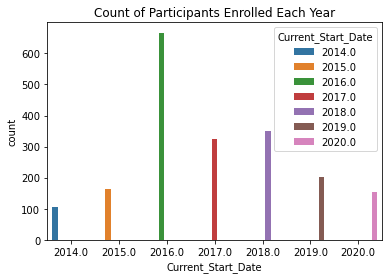

In [19]:
sns.countplot(x="Current_Start_Date", hue="Current_Start_Date", data=masterdf)
plt.title('Count of Participants Enrolled Each Year')

Avg Savings Rate by Start Date: Current_Start_Date
2014.0    0.007895
2015.0    0.005476
2016.0    0.017970
2017.0    0.012729
2018.0    0.013034
2019.0    0.045748
2020.0    0.046430
Name: Sav_rate, dtype: float64


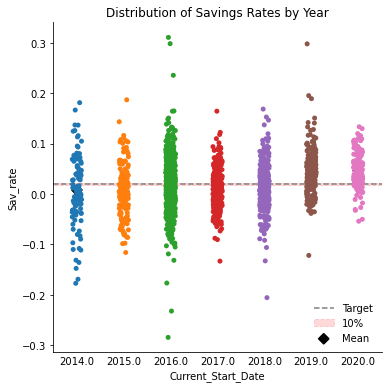

In [20]:
#sns.countplot(x="Sav_rate", hue="Current_Start_Date", data=masterdf)
print("Avg Savings Rate by Start Date:",masterdf.groupby(['Current_Start_Date'])['Sav_rate'].mean())
g = sns.catplot(data=masterdf, x="Current_Start_Date", y="Sav_rate", height=5.50, aspect=1)
ax = g.ax
ax.tick_params(axis='x', rotation=0, length=0)
sns.pointplot(data=masterdf, x="Current_Start_Date", y="Sav_rate", estimator=np.mean,
              join=False, ci=None, markers=['D'], color='black', size=20, zorder=3, ax=ax)
sns.despine(right=True, top=True)

sp = masterdf['Sav_rate'].mean()
delta = 10
ax.axhline(y=sp, color='gray', linestyle='--', label='Target')
ax.axhspan(ymin=sp * (100 - delta) / 100, ymax=sp * (100 + delta) / 100,
           color='r', alpha=0.15, linestyle='--', label='10%')

ax.collections[-1].set_label('Mean')
ax.legend(frameon=False, loc="lower right")
plt.title("Distribution of Savings Rates by Year")
plt.tight_layout()
plt.show()

Final Share Rate Avg each year: Current_Start_Date
2014.0    0.461089
2015.0    0.459155
2016.0    0.474166
2017.0    0.502995
2018.0    0.490083
2019.0    0.501089
2020.0    0.474248
Name: FinalShareRate, dtype: float64
Final Share Rate Avg by Risk Model: Risk_Model
One-Sided    0.431084
Two-Sided    0.591895
Name: FinalShareRate, dtype: float64


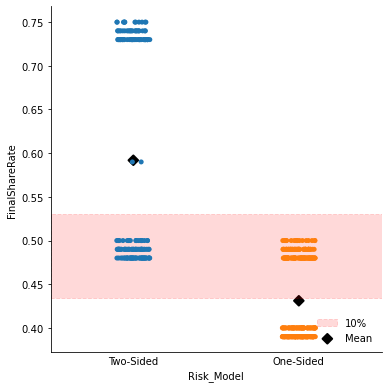

In [21]:
print('Final Share Rate Avg each year:',masterdf.groupby(['Current_Start_Date'])['FinalShareRate'].mean())
print('Final Share Rate Avg by Risk Model:',masterdf.groupby(['Risk_Model'])['FinalShareRate'].mean())

g = sns.catplot(data=jan2020, x="Risk_Model", y="FinalShareRate", height=5.50, aspect=1)
ax = g.ax
ax.tick_params(axis='x', rotation=0, length=0)
sns.pointplot(data=masterdf, x="Risk_Model", y="FinalShareRate", estimator=np.mean,
              join=False, ci=None, markers=['D'], color='black', size=20, zorder=3, ax=ax)
sns.despine(right=True, top=True)

sp = masterdf['FinalShareRate'].mean()
delta = 10
ax.axhspan(ymin=sp * (100 - delta) / 100, ymax=sp * (100 + delta) / 100,
           color='r', alpha=0.15, linestyle='--', label='10%')

ax.collections[-1].set_label('Mean')
ax.legend(frameon=False, loc="lower right")
# plt.savefig(outputFileName, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

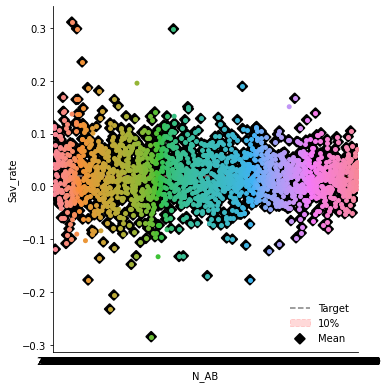

In [23]:
g = sns.catplot(data=masterdf, x="N_AB", y="Sav_rate", height=5.50, aspect=1)
ax = g.ax
ax.tick_params(axis='x', rotation=0, length=0)
sns.pointplot(data=masterdf, x="N_AB", y="Sav_rate", estimator=np.mean,
              join=False, ci=None, markers=['D'], color='black', size=20, zorder=3, ax=ax)
sns.despine(right=True, top=True)

sp = masterdf['Sav_rate'].mean()
delta = 10
ax.axhline(y=sp, color='gray', linestyle='--', label='Target')
ax.axhspan(ymin=sp * (100 - delta) / 100, ymax=sp * (100 + delta) / 100,
           color='r', alpha=0.15, linestyle='--', label='10%')

ax.collections[-1].set_label('Mean')
ax.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()

Average SAV rate by QPS: Met_QPS
0   -0.070973
1    0.009726
Name: Sav_rate, dtype: float64


<AxesSubplot:xlabel='Met_QPS'>

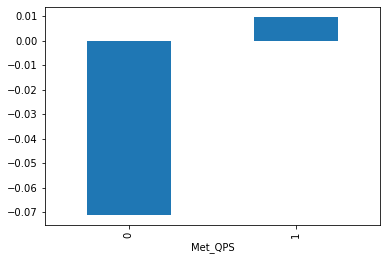

In [24]:
print('Average SAV rate by QPS:',jan2016.groupby(['Met_QPS'])['Sav_rate'].mean())
jan2016.groupby(['Met_QPS'])['Sav_rate'].mean().plot(kind='bar')

#demonstrates that meeting Quality Standards leads to a higher savings rate

<AxesSubplot:xlabel='Met_QPS'>

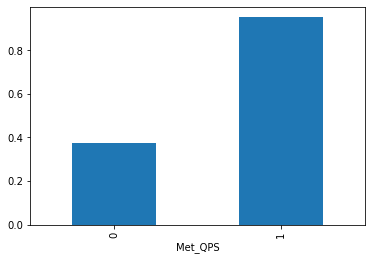

In [25]:
jan2016.groupby(['Met_QPS'])['QualScore'].mean().plot(kind='bar')
#showing that quality score increases when performance standards are met in 2016

# Data Cleaning- 2020 Dataset

In [26]:
#finding null values
jan2020.isnull().sum()

ACO_ID                           0
ACO_Name                         0
ACO_State                        0
Agree_Type                       0
Agreement_Period_Num             0
Initial_Start_Date               0
Current_Start_Date               0
Current_Track_1                  0
Current_Track_2                  0
Current_Track_3                  0
Current_Track_1_Plus             0
Current_BASIC_A                  0
Current_BASIC_B                  0
Current_BASIC_C                  0
Current_BASIC_D                  0
Current_BASIC_E                  0
Current_ENHANCED                 0
Risk_Model                       0
Adv_Pay                          0
AIM                              0
SNF_Waiver                       0
N_AB                             0
Sav_rate                         0
MinSavPerc                       0
BnchmkMinExp                     0
GenSaveLoss                      0
DisAdj                         512
EarnSaveLoss                     0
DisAffQual          

In [27]:
#drop columns with mostly null values
jan2020=jan2020.drop(['DisAdj', 'Adv_Pay_Amt','Adv_Pay_Recoup', 'PosRegAdj'], axis=1)

#drop columns with no unique values-no usefull values
jan2020=jan2020.drop(['ACO1','ACO2','ACO3','ACO4','ACO5','ACO6',
                      'ACO7','ACO34','ACO45', 'ACO46','ACO8','ACO38'], axis=1)

In [28]:
jan2020.head()

,ACO_ID,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Current_Start_Date,Current_Track_1,Current_Track_2,Current_Track_3,Current_Track_1_Plus,Current_BASIC_A,Current_BASIC_B,Current_BASIC_C,Current_BASIC_D,Current_BASIC_E,Current_ENHANCED,Risk_Model,Adv_Pay,AIM,SNF_Waiver,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,GenSaveLoss,EarnSaveLoss,DisAffQual,Met_QPS,QualScore,RecvdMean,RegTrndUpdt,UpdatedBnchmk,HistBnchmk,ABtotBnchmk,ABtotExp,QualPerfShare,FinalShareRate,RevLossLimit,Rev_Exp_Cat,Per_Capita_Exp_ALL_ESRD_BY1,Per_Capita_Exp_ALL_DIS_BY1,Per_Capita_Exp_ALL_AGDU_BY1,Per_Capita_Exp_ALL_AGND_BY1,Per_Capita_Exp_ALL_ESRD_BY2,Per_Capita_Exp_ALL_DIS_BY2,Per_Capita_Exp_ALL_AGDU_BY2,Per_Capita_Exp_ALL_AGND_BY2,Per_Capita_Exp_ALL_ESRD_BY3,Per_Capita_Exp_ALL_DIS_BY3,Per_Capita_Exp_ALL_AGDU_BY3,Per_Capita_Exp_ALL_AGND_BY3,Per_Capita_Exp_ALL_ESRD_PY,Per_Capita_Exp_ALL_DIS_PY,Per_Capita_Exp_ALL_AGDU_PY,Per_Capita_Exp_ALL_AGND_PY,Per_Capita_Exp_TOTAL_PY,CMS_HCC_RiskScore_ESRD_BY1,CMS_HCC_RiskScore_DIS_BY1,CMS_HCC_RiskScore_AGDU_BY1,CMS_HCC_RiskScore_AGND_BY1,CMS_HCC_RiskScore_ESRD_BY2,CMS_HCC_RiskScore_DIS_BY2,CMS_HCC_RiskScore_AGDU_BY2,CMS_HCC_RiskScore_AGND_BY2,CMS_HCC_RiskScore_ESRD_BY3,CMS_HCC_RiskScore_DIS_BY3,CMS_HCC_RiskScore_AGDU_BY3,CMS_HCC_RiskScore_AGND_BY3,CMS_HCC_RiskScore_ESRD_PY,CMS_HCC_RiskScore_DIS_PY,CMS_HCC_RiskScore_AGDU_PY,CMS_HCC_RiskScore_AGND_PY,N_AB_Year_ESRD_BY3,N_AB_Year_DIS_BY3,N_AB_Year_AGED_Dual_BY3,N_AB_Year_AGED_NonDual_BY3,N_AB_Year_PY,N_AB_Year_ESRD_PY,N_AB_Year_DIS_PY,N_AB_Year_AGED_Dual_PY,N_AB_Year_AGED_NonDual_PY,N_Ben_Age_0_64,N_Ben_Age_65_74,N_Ben_Age_75_84,N_Ben_Age_85plus,N_Ben_Female,N_Ben_Male,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other,CapAnn_INP_All,CapAnn_INP_S_trm,CapAnn_INP_L_trm,CapAnn_INP_Rehab,CapAnn_INP_Psych,CapAnn_HSP,CapAnn_SNF,CapAnn_OPD,CapAnn_PB,CapAnn_AmbPay,CapAnn_HHA,CapAnn_DME,ADM,ADM_S_Trm,ADM_L_Trm,ADM_Rehab,ADM_Psych,chf_adm,copd_adm,prov_Rate_1000,P_EDV_Vis,P_EDV_Vis_HOSP,P_CT_VIS,P_MRI_VIS,P_EM_Total,P_EM_PCP_Vis,P_EM_SP_Vis,P_Nurse_Vis,P_FQHC_RHC_Vis,P_SNF_ADM,N_CAH,N_FQHC,N_RHC,N_ETA,N_Hosp,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS,ACO43,ACO13,ACO14,ACO17,ACO18,ACO19,ACO20,ACO42,ACO40,ACO27,ACO28
0,A1001,Palm Beach Accountable Care Organization,FL,Renewal,3,7/1/2012,7/1/2019,0,0,0,0,0,0,0,0,0,1,Two-Sided,0,0,1,80864,0.0757,0.0200,72427998,72427998,54320998,1,1,100.00,0,0,12098,13044,956864945,884436947,0.75,0.75,0,Low Revenue,83980,11731,17307,11370,81423,11713,16704,11600,86154,12158,16628,11718,80878,10941,13860,10598,11182,1.012,1.096,1.081,1.156,1.009,1.029,1.059,1.140,1.019,1.041,1.075,1.150,1.010,1.052,1.078,1.147,517,4030,4874,71808,79093,454,3172,4035,71432,4986,34477,28630,12771,46817,34047,71224,3447,484,2558,29,3122,2514,2219,55,233,29,245,389,1657,5591,79,658,305,237,220,1,12,3,10,4,831,452,183,676,338,15065,6291,7776,985,13,35,0,0,0,0,0,0,466,691,319,112,0,0.91,91.19,90.12,94.87,86.08,87.15,90.08,93.93,42.86,6.83,92.03
1,A1006,Hackensack Alliance ACO,"NJ, NY",Renewal,3,4/1/2012,7/1/2019,0,0,0,0,0,1,0,0,0,0,One-Sided,0,0,0,33798,-0.0050,0.0236,-1917725,0,0,1,1,97.81,0,0,11725,12649,383064284,384982008,0.40,0.39,0,Low Revenue,92527,12686,15676,11075,91754,12889,17254,11559,102859,12368,18318,11520,100849,12904,19170,10451,11784,1.010,1.047,0.987,1.062,1.030,1.006,1.019,1.042,1.009,0.975,1.014,1.016,1.027,1.022,1.021,0.995,256,2272,2275,30720,32669,223,1997,2124,28325,2937,14846,10600,5415,20130,13668,27545,2151,1162,942,15,1983,3119,2818,30,207,91,216,1235,2598,4053,106,533,218,248,232,1,8,6,13,4,801,454,197,641,250,11500,4011,6683,803,3,66,0,0,0,0,1,3,464,680,216,121,4,0.72,92.6,80,100,79.86,76,76.89,87.18,14.29,8.53,80.09
2,A1023,"Arizona Connected Care, LLC",AZ,Renewal,3,4/1/2012,7/1/2019,0,0,0,0,0,1,0,0,0,0,One-Sided,0,0,0,10146,-0.0204,0.0299,-1816209,0,0,1,1,96.87,1,0,8924,9871,89013515,90829724,0.40,0.39,0,Low Revenue,72508,9399,7241,8224,66210,10009,8301,8524,72636,8954,7858,8

In [29]:
'''Quality score: In Performance Year 1 of an ACO’sfirst agreement period, 
the quality score is 100% if all measures were completely reported and less than 100% if one or more
measures were not completely reported. Beyond Performance Year 1 of an ACO’s first agreement period,
the quality score will be determined not only by whether all measures were completely
reported but also on their performance against established benchmarks and on quality improvement'''

jan2020['QualScore'].unique()

array([100.  ,  97.81,  96.87,  97.19,  99.06,  96.88,  99.38,  98.75,
        98.13,  97.5 ,  98.44,  99.53,  97.56,  97.66,  97.97,  99.69,
        98.19,  98.28,  97.34,  98.97,  97.03,  97.88,  99.75,  99.44,
        97.25,  97.41,  99.4 ,  97.21,  98.77,  98.91,  97.83,  97.09,
        98.59,  96.94,  98.66,  98.46,  98.34])

In [30]:
'''QualPerfShare
Maximum percentage of savings an ACO can
share based on the ACO’s track, before
accounting for quality performance'''
jan2020['QualPerfShare'].unique()

array([0.75, 0.4 , 0.5 , 0.6 ])

In [31]:
'''FinalShareRate
Quality performance sharing rate
(QualPerfShare) multiplied by quality score
(QualScore). The percentage of savings an ACO
shares if the ACO is eligible for shared savings.
Will equalzero if ACO failed to meet quality
performance standard.'''

#possible y value for model

jan2020['FinalShareRate'].unique()

array([0.75, 0.39, 0.49, 0.48, 0.74, 0.73, 0.5 , 0.4 , 0.59])

<AxesSubplot:>

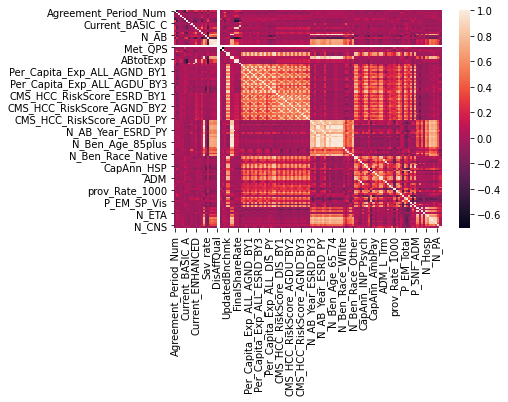

In [32]:
#jan2020
sns.heatmap(jan2020.corr())


In [33]:
jan2020.dtypes

ACO_ID                          object
ACO_Name                        object
ACO_State                       object
Agree_Type                      object
Agreement_Period_Num             int64
Initial_Start_Date              object
Current_Start_Date              object
Current_Track_1                  int64
Current_Track_2                  int64
Current_Track_3                  int64
Current_Track_1_Plus             int64
Current_BASIC_A                  int64
Current_BASIC_B                  int64
Current_BASIC_C                  int64
Current_BASIC_D                  int64
Current_BASIC_E                  int64
Current_ENHANCED                 int64
Risk_Model                      object
Adv_Pay                          int64
AIM                              int64
SNF_Waiver                       int64
N_AB                             int64
Sav_rate                       float64
MinSavPerc                     float64
BnchmkMinExp                     int64
GenSaveLoss              

# Pre-processing

In [34]:
newdf=jan2020.copy()

In [35]:
profit_val=newdf['FinalShareRate']
newdf=newdf.drop(['FinalShareRate','QualPerfShare'], axis=1)

In [36]:
#removing these columns due to not being  as relevant to predicting profit and scores
newdf=newdf.drop(['ACO_ID','ACO_Name','ACO_State', 'Initial_Start_Date','Current_Start_Date','ACO43','ACO13',
                  'ACO14', 'ACO17','ACO18','ACO19', 'ACO20', 'ACO42','ACO40','ACO27', 'ACO28'], axis=1)

In [37]:
newdf.dtypes

Agree_Type                      object
Agreement_Period_Num             int64
Current_Track_1                  int64
Current_Track_2                  int64
Current_Track_3                  int64
Current_Track_1_Plus             int64
Current_BASIC_A                  int64
Current_BASIC_B                  int64
Current_BASIC_C                  int64
Current_BASIC_D                  int64
Current_BASIC_E                  int64
Current_ENHANCED                 int64
Risk_Model                      object
Adv_Pay                          int64
AIM                              int64
SNF_Waiver                       int64
N_AB                             int64
Sav_rate                       float64
MinSavPerc                     float64
BnchmkMinExp                     int64
GenSaveLoss                      int64
EarnSaveLoss                     int64
DisAffQual                       int64
Met_QPS                          int64
QualScore                      float64
RecvdMean                

In [38]:
# columns with object data types to convert into standard features
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#scaling numeric features
scaler=RobustScaler()

for i in range(0,newdf.shape[1]):
    if newdf.dtypes[i]=='int64' or newdf.dtypes[i]=='float':
        newdf[newdf.columns[i]] = scaler.fit_transform(newdf[newdf.columns[i]].values.reshape(-1, 1))
                                    #scaler.fit_transform(df['Col1'].values.reshape(-1,1))

#In [4]: df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#encoding categorical variables 
categ=['Rev_Exp_Cat', 'Risk_Model', 'Agree_Type']
le = LabelEncoder()

newdf[categ] = newdf[categ].apply(le.fit_transform)

newdf.head()

,Agree_Type,Agreement_Period_Num,Current_Track_1,Current_Track_2,Current_Track_3,Current_Track_1_Plus,Current_BASIC_A,Current_BASIC_B,Current_BASIC_C,Current_BASIC_D,Current_BASIC_E,Current_ENHANCED,Risk_Model,Adv_Pay,AIM,SNF_Waiver,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,GenSaveLoss,EarnSaveLoss,DisAffQual,Met_QPS,QualScore,RecvdMean,RegTrndUpdt,UpdatedBnchmk,HistBnchmk,ABtotBnchmk,ABtotExp,RevLossLimit,Rev_Exp_Cat,Per_Capita_Exp_ALL_ESRD_BY1,Per_Capita_Exp_ALL_DIS_BY1,Per_Capita_Exp_ALL_AGDU_BY1,Per_Capita_Exp_ALL_AGND_BY1,Per_Capita_Exp_ALL_ESRD_BY2,Per_Capita_Exp_ALL_DIS_BY2,Per_Capita_Exp_ALL_AGDU_BY2,Per_Capita_Exp_ALL_AGND_BY2,Per_Capita_Exp_ALL_ESRD_BY3,Per_Capita_Exp_ALL_DIS_BY3,Per_Capita_Exp_ALL_AGDU_BY3,Per_Capita_Exp_ALL_AGND_BY3,Per_Capita_Exp_ALL_ESRD_PY,Per_Capita_Exp_ALL_DIS_PY,Per_Capita_Exp_ALL_AGDU_PY,Per_Capita_Exp_ALL_AGND_PY,Per_Capita_Exp_TOTAL_PY,CMS_HCC_RiskScore_ESRD_BY1,CMS_HCC_RiskScore_DIS_BY1,CMS_HCC_RiskScore_AGDU_BY1,CMS_HCC_RiskScore_AGND_BY1,CMS_HCC_RiskScore_ESRD_BY2,CMS_HCC_RiskScore_DIS_BY2,CMS_HCC_RiskScore_AGDU_BY2,CMS_HCC_RiskScore_AGND_BY2,CMS_HCC_RiskScore_ESRD_BY3,CMS_HCC_RiskScore_DIS_BY3,CMS_HCC_RiskScore_AGDU_BY3,CMS_HCC_RiskScore_AGND_BY3,CMS_HCC_RiskScore_ESRD_PY,CMS_HCC_RiskScore_DIS_PY,CMS_HCC_RiskScore_AGDU_PY,CMS_HCC_RiskScore_AGND_PY,N_AB_Year_ESRD_BY3,N_AB_Year_DIS_BY3,N_AB_Year_AGED_Dual_BY3,N_AB_Year_AGED_NonDual_BY3,N_AB_Year_PY,N_AB_Year_ESRD_PY,N_AB_Year_DIS_PY,N_AB_Year_AGED_Dual_PY,N_AB_Year_AGED_NonDual_PY,N_Ben_Age_0_64,N_Ben_Age_65_74,N_Ben_Age_75_84,N_Ben_Age_85plus,N_Ben_Female,N_Ben_Male,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other,CapAnn_INP_All,CapAnn_INP_S_trm,CapAnn_INP_L_trm,CapAnn_INP_Rehab,CapAnn_INP_Psych,CapAnn_HSP,CapAnn_SNF,CapAnn_OPD,CapAnn_PB,CapAnn_AmbPay,CapAnn_HHA,CapAnn_DME,ADM,ADM_S_Trm,ADM_L_Trm,ADM_Rehab,ADM_Psych,chf_adm,copd_adm,prov_Rate_1000,P_EDV_Vis,P_EDV_Vis_HOSP,P_CT_VIS,P_MRI_VIS,P_EM_Total,P_EM_PCP_Vis,P_EM_SP_Vis,P_Nurse_Vis,P_FQHC_RHC_Vis,P_SNF_ADM,N_CAH,N_FQHC,N_RHC,N_ETA,N_Hosp,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS
0,2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,1.0,4.434531,0.719770,-0.471698,6.632056,5.766408,8.774367,0.0,0.0,1.377660,0.0,0.0,0.889398,0.984174,5.453876,5.160201,0.0,1,0.243172,0.917066,0.516197,1.343016,-0.024869,0.803546,0.320581,1.385887,0.263668,0.793546,0.179547,1.192771,0.019627,0.421928,-0.486040,1.041609,0.584401,0.058824,0.898305,0.606299,1.46,-0.064516,0.386792,0.458015,1.297030,0.203125,0.504587,0.530303,1.416667,0.154930,0.565574,0.500000,1.35,2.957143,1.185681,3.052308,4.806685,4.443060,2.767442,1.123086,2.872247,4.774817,1.656158,3.927737,5.881814,5.877668,4.562514,4.487693,4.453254,1.658204,1.820388,9.955466,0.818182,4.636054,-0.494203,-0.401550,0.000000,-0.016304,-0.413043,-0.101911,-0.569975,-0.654226,1.829926,-0.500000,0.667925,0.084337,-0.416667,-0.411765,-0.5,0.1,-0.50,-0.6,0.000000,1.020833,-0.741497,-0.074074,0.300000,2.232143,2.363717,1.573222,2.463876,-0.669444,-0.081886,-0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,1.145390,0.811765,0.990338,0.528926,0.0
1,2,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.371535,-0.829175,-0.132075,-0.730765,-0.460443,-0.421368,0.0,0.0,0.212766,0.0,0.0,0.675645,0.788823,1.642395,1.738288,0.0,1,0.789831,1.374880,0.086647,1.160692,0.606379,1.367034,0.483689,1.359822,1.365363,0.886384,0.619308,1.073494,1.399793,1.259386,0.803108,0.939667,0.919777,0.029412,0.483051,-0.133858,0.52,0.274194,0.169811,0.152672,0.326733,0.046875,-0.100917,0.068182,0.020833,0.394366,0.319672,0.098592,-0.17,1.092857,0.373672,1.053077,1.612903,1.349570,0.976744,0.431095,1.188546,1.426441,0.646798,1.230801,1.645442,2.048412,1.490099,1.272326,1.237780,0.855728,5.111650,3.412955,0.181818,2.698980,0.382609,0.527132,-0.390625,-0.157609,0.934783,-0.286624,1.582697,0.378705,0.572363,-0.034483,0.196226,-0.963855,-0.233333,-0.176471,-0.5,-0.3,0.25,0.0,0.000000,0.395833,-0.727891,0.185185,0.008333,0.660714,0.786283,0.2

# Decision Tree Regression

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

xd=newdf
yd=profit_val

xd_train, xd_test, yd_train, yd_test=train_test_split(xd, yd, test_size=0.33, random_state=42)

In [40]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(xd_train, yd_train)
regr_2.fit(xd_train, yd_train)

print("Score max dept=2:",regr_1.score(xd_test, yd_test))
print('Score max dept=5:', regr_2.score(xd_test, yd_test))

Score max dept=2: 0.9431836149718984
Score max dept=5: 0.9983444267338631


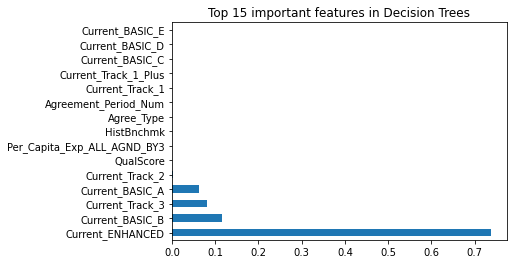

In [41]:
#Finding the important features for the decision tree model
feat_importances_xd = pd.Series(np.abs(regr_2.feature_importances_), index=xd.columns)
feat_importances_xd.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features in Decision Trees")
plt.show()

# Random Forest Regression

In [42]:
x=newdf
y=profit_val

In [43]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score 
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [45]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
#fit the model 
rf.fit(x_train,y_train)
# make prediction 
preds = rf.predict(x_test) 
# check performance
print('Training score:',rf.score(x_train, y_train))
print('Test Score:', rf.score(x_test,y_test))

Training score: 0.9996600866153922
Test Score: 0.9993494057155832


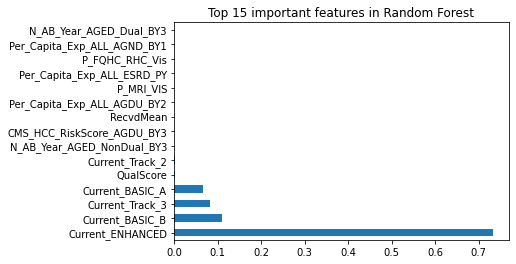

In [46]:
feat_importances = pd.Series(np.abs(rf.feature_importances_), index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features in Random Forest")
plt.show()

# Gaussian Process Regression

In [47]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plot

kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)

# Fit GPR model
gpr.fit(x_train, y_train)
# Score GPR model
print("Gaussian Process Regressor Score:",gpr.score(x_test,y_test))

Gaussian Process Regressor Score: 0.935649107868992
